<a href="https://colab.research.google.com/github/JeongeunL/My_Project/blob/main/LUSH_bodyspray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터셋 출처
* 1. LUSH 앱 내 데이터: LUSH Korea 앱 내 바디 스프레이 제품들의 리뷰를 직접 데이터셋으로 만들어 사용함 (2021-2025.1: 4년 분량의 데이터)
<br>
(바디스프레이 데이터를 사용한 이유: 배쓰밤은 생김새나 색상이 다른 반면 바디 스프레이는 모든 제품의 겉이 똑같고, 향수는 바디스프레이에 비해 구매 수가 적기 때문)
* 2. 2021-2025 월별 평균 기온 데이터: 기상자료개방포털에서 제공하는 서울의 2021~2025년의 약 4개년의 서울의 월별 평균 기온 데이터
<br>
(한계: 전국의 평균 기온을 제공하지 않아서, 우리나라 도시 중 가장 많은 인구가 거주하는 서울의 평균 기온만을 사용함)

### 데이터 구성
####1. LUSH 앱 내 데이터
#####1) 제품 데이터
* item: 제품의 이름 (바디 스프레이)
* note: 제품에 사용된 향료
* scent_note: 제품에 사용된 향료의 계열
* scent_detail: LUSH에서 분류한 해당 제품의 향 계열
* price: 제품의 가격

#####2) 리뷰 데이터
* year: 리뷰가 작성된 연도
* month: 리뷰가 작성된 달
* (제품의 판매량을 직접적으로 알 수 없으므로, 이 분석에서 리뷰 수를 간접적인 판매량으로 간주함)

#### 2. 2021-2025 월별 평균 기온 데이터
##### 1) 평균 기온 데이터
* 지점명: 기온을 관측한 지역 (이 데이터에서는 서울)
* 일시: 기온이 관측된 달 (2021년 1월~2025년 1월)
* 평균기온: 해당 달의 평균 기온
* 평균최고기온: 해당 달의 매일의 최고 기온들을 평균 낸 값
* 최고기온: 해당 달의 최고 기온
* 최고기온일자: 해당 달에 최고 기온을 기록한 일자
* 평균최저기온: 해당 달의 매일의 최저 기온들을 평균 낸 값
* 최저기온: 해당 달의 최저 기온
* 최저기온일자: 해당 달에 최저 기온을 기록한 일자

### 관련된 문제 가정
* 계절별로 인기가 있는 item과 향을 확인하여 이벤트 및 신제품 출시 일정에 참고

### 나의 가설
* 전제 지식: 향료가 가진 각자의 고유한 향은 사용자로 하여금 시원한 느낌을 주기도 하고, 따뜻한 느낌을 주기도 한다. 예를 들어 시트러스 향은 상쾌한 느낌, 발삼과 우디 향은 묵직한 느낌, 플로럴 향은 싱그러운 느낌이다.

* **가설: 따라서 계절에 따른 제품의 구매 빈도에 차이가 있을 것이다.**
* 추가 가설: 플로럴 향이 포함된 제품은 봄에, 시트러스 향이 포함된 제품은 봄/여름에 많이 판매되고, 발삼과 우디 향이 포함된 제품은 가을/겨울에 많이 판매될 것이다.

### 라이브러리 로드 및 기본 설정

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# userwarning 메시지 끄기 (다시 켜려면 default로)
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Google Drive 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.font_manager as fm
!apt-get update -qq
!apt-get install fonts-nanum* -qq

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
plt.rcParams['axes.unicode_minus'] = False

###데이터 불러오기

In [ ]:
PATH = "/content/drive/MyDrive/Colab Notebooks/MyProject/data/"

In [ ]:
df = pd.read_csv(PATH + "LUSH_spray.csv")
df.head()

,item,note,scent_note,scent_detail,price,year,month
0,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1
1,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1
2,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1
3,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1
4,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1


In [ ]:
df.shape # 2340개의 데이터, 7개의 features

(2341, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item          2341 non-null   object
 1   note          2341 non-null   object
 2   scent_note    2341 non-null   object
 3   scent_detail  2341 non-null   object
 4   price         2341 non-null   int64 
 5   year          2341 non-null   int64 
 6   month         2341 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 128.2+ KB


In [ ]:
df.isnull().sum() # 데이터 내에 결측치 없음 확인

,0
item,0
note,0
scent_note,0
scent_detail,0
price,0
year,0
month,0


In [ ]:
weather = pd.read_csv(PATH + "2021-2025_월별평균기온.csv", encoding="cp949")
weather.head()

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,\t\t108,서울,Jan-21,-2.4,2.2,13.9,2021-01-25,-6.8,-18.6,2021-01-08
1,\t\t108,서울,Feb-21,2.7,7.9,17.4,2021-02-21,-2.2,-10.6,2021-02-18
2,\t\t108,서울,Mar-21,9.0,14.8,22.9,2021-03-31,4.3,-1.2,2021-03-03
3,\t\t108,서울,Apr-21,14.2,19.5,28.2,2021-04-21,9.5,3.1,2021-04-14
4,\t\t108,서울,May-21,17.1,21.9,30.8,2021-05-14,12.8,7.3,2021-05-02


In [ ]:
weather.shape

(68, 10)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   		지점번호     57 non-null     object 
 1   지점명        49 non-null     object 
 2   일시         49 non-null     object 
 3   평균기온(℃)    49 non-null     float64
 4   평균최고기온(℃)  49 non-null     float64
 5   최고기온(℃)    49 non-null     float64
 6   	최고기온일자    49 non-null     object 
 7   평균최저기온(℃)  49 non-null     float64
 8   최저기온(℃)    49 non-null     float64
 9   최저기온일자     49 non-null     object 
dtypes: float64(5), object(5)
memory usage: 5.4+ KB


In [ ]:
weather.isnull().sum()

,0
\t\t지점번호,11
지점명,19
일시,19
평균기온(℃),19
평균최고기온(℃),19
최고기온(℃),19
\t최고기온일자,19
평균최저기온(℃),19
최저기온(℃),19
최저기온일자,19


In [ ]:
weather.tail() # 끝부분에 결측치가 몰려 있는 것으로 보임

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
63,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather = weather.iloc[0:49]
weather.tail() # 2025년 1월 기온까지 정상적으로 나온다

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
44,\t\t108,서울,Sep-24,25.5,29.8,34.6,2024-09-11,22.0,15.6,2024-09-24
45,\t\t108,서울,Oct-24,16.7,21.4,25.7,2024-10-17,12.7,7.1,2024-10-24
46,\t\t108,서울,Nov-24,9.7,14.9,25.1,2024-11-02,5.5,-3.4,2024-11-29
47,\t\t108,서울,Dec-24,0.8,5.3,13.0,2024-12-02,-2.9,-7.7,2024-12-22
48,\t\t108,서울,Jan-25,0.0,4.6,11.4,2025-01-25,-3.9,-12.2,2025-01-10


In [ ]:
weather.isnull().sum() # 결측치를 모두 제거

,0
\t\t지점번호,0
지점명,0
일시,0
평균기온(℃),0
평균최고기온(℃),0
최고기온(℃),0
\t최고기온일자,0
평균최저기온(℃),0
최저기온(℃),0
최저기온일자,0


In [ ]:
weather.head() # 지점번호, 지점명, 최고기온일자, 최저기온일자는 필요하지 않다고 판단하여 제외하기로 함

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,\t\t108,서울,Jan-21,-2.4,2.2,13.9,2021-01-25,-6.8,-18.6,2021-01-08
1,\t\t108,서울,Feb-21,2.7,7.9,17.4,2021-02-21,-2.2,-10.6,2021-02-18
2,\t\t108,서울,Mar-21,9.0,14.8,22.9,2021-03-31,4.3,-1.2,2021-03-03
3,\t\t108,서울,Apr-21,14.2,19.5,28.2,2021-04-21,9.5,3.1,2021-04-14
4,\t\t108,서울,May-21,17.1,21.9,30.8,2021-05-14,12.8,7.3,2021-05-02


In [ ]:
weather = weather.drop(['\t\t지점번호', '지점명', '\t최고기온일자', '최저기온일자'], axis=1)
weather.head()

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
0,Jan-21,-2.4,2.2,13.9,-6.8,-18.6
1,Feb-21,2.7,7.9,17.4,-2.2,-10.6
2,Mar-21,9.0,14.8,22.9,4.3,-1.2
3,Apr-21,14.2,19.5,28.2,9.5,3.1
4,May-21,17.1,21.9,30.8,12.8,7.3


In [ ]:
# weather의 일시에서 year를 추출하여 개별 컬럼으로 생성
def extract_year(date_string):
    return int(date_string.split('-')[1])

def extract_month(date_string):
    return str(date_string.split('-')[0])

weather['year'] = weather['일시'].apply(extract_year) + 2000
weather['months'] = weather['일시'].apply(extract_month)
weather.head()

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),year,months
0,Jan-21,-2.4,2.2,13.9,-6.8,-18.6,2021,Jan
1,Feb-21,2.7,7.9,17.4,-2.2,-10.6,2021,Feb
2,Mar-21,9.0,14.8,22.9,4.3,-1.2,2021,Mar
3,Apr-21,14.2,19.5,28.2,9.5,3.1,2021,Apr
4,May-21,17.1,21.9,30.8,12.8,7.3,2021,May


In [ ]:
month_dict = {
  'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
  'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

weather['month'] = weather['months'].map(month_dict)
weather = weather.drop(['일시','months'], axis=1)

In [ ]:
weather.head() # year와 month를 변환 완료

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),year,month
0,-2.4,2.2,13.9,-6.8,-18.6,2021,1
1,2.7,7.9,17.4,-2.2,-10.6,2021,2
2,9.0,14.8,22.9,4.3,-1.2,2021,3
3,14.2,19.5,28.2,9.5,3.1,2021,4
4,17.1,21.9,30.8,12.8,7.3,2021,5


### EDA

In [ ]:
df['item'].unique() # 제품 목록

array(['Sakura', 'Big', 'Rose Jam', 'The Comporter',
       "Dad's Garden Lemon Tree", 'Zesty', 'Honey I Washed the Kids',
       'Sex Bomb', 'Salty', 'Plum Rain', 'Guardians of the Forest',
       'Avocado Co-Wash', 'Dirty', 'Twilight', 'Let the Good Times Roll'],
      dtype=object)

In [ ]:
df['item'].nunique() # 제품의 개수: 15개

15

In [ ]:
df['price'].unique() # 제품의 가격 확인

array([80000, 70000])

In [ ]:
df_price = df.copy()

# 가격과 총 판매량을 한 그래프에 그리기 위해 스케일 변경
df_price.loc[df_price['price'] == 70000, 'price'] = 700
df_price.loc[df_price['price'] == 80000, 'price'] = 800
df_price.head()

,item,note,scent_note,scent_detail,price,year,month
0,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,800,2025,1
1,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,800,2025,1
2,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,800,2025,1
3,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,800,2025,1
4,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,800,2025,1


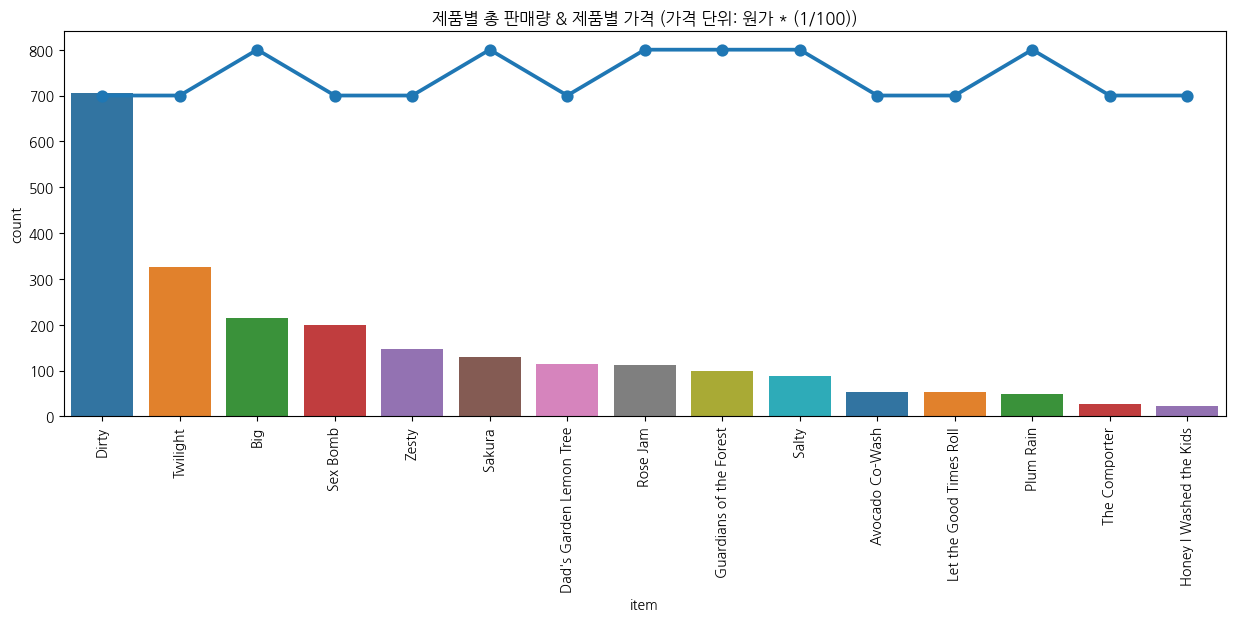

In [ ]:
# 제품의 총 판매량 & 제품별 가격 그래프
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data=df, x="item", order = df["item"].value_counts().index, palette="tab10")
sns.pointplot(x = "item", y = "price", data=df_price)
plt.title('제품별 총 판매량 & 제품별 가격 (가격 단위: 원가 * (1/100))')
plt.show()
# order를 이용하여 내림차순으로 그래프 표현

In [ ]:
### 해석 ###
# 가장 많이 팔린 제품은 Dirty이다.
# 가장 적게 팔린 제품은 The Comporter와 Honey I washed the Kids이다.
# 상위 5개 제품의 가격 분포와 하위 5개 제품의 가격 분포가 같은 것으로 보아,
# 현재 제품의 가격이 제품의 판매량에 큰 변수는 아닌 것으로 보인다.

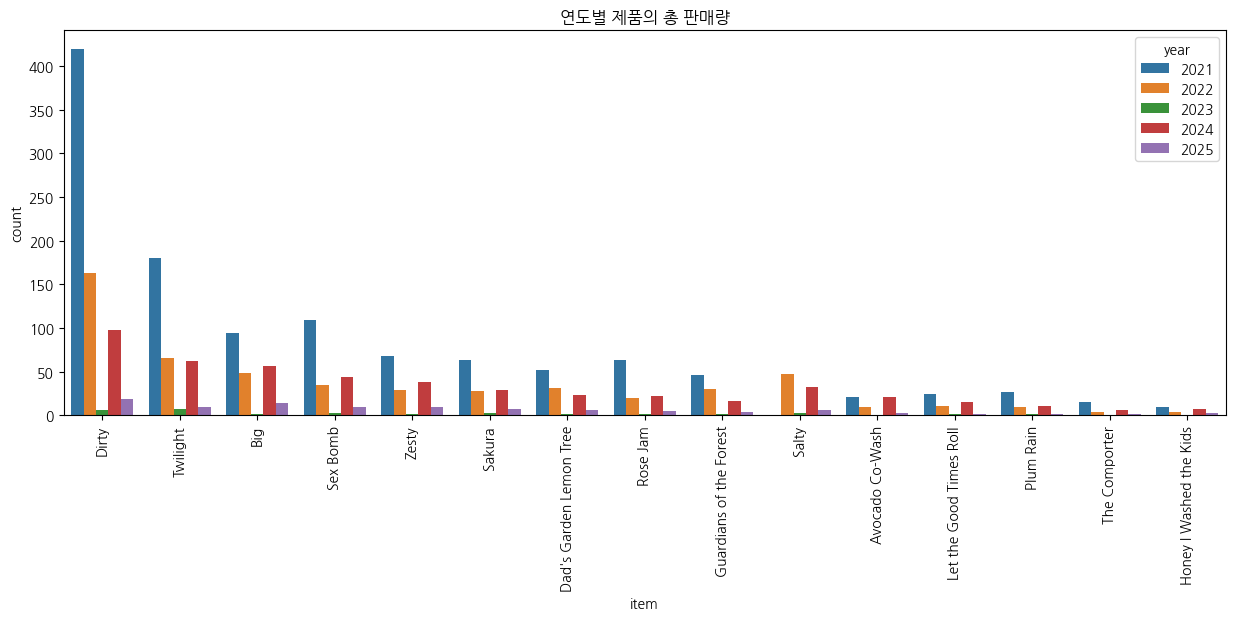

In [ ]:
# 제품의 총 판매량 (연도별)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data=df, x="item", hue="year", order = df["item"].value_counts().index, palette="tab10")
plt.title('연도별 제품의 총 판매량')
plt.show()

In [ ]:
### 해석 ###
# 모든 제품이 대체로 2021년에 가장 많이 판매되었고, 2022년과 2024년엔 비슷한 수준으로 판매되었다.
# 2023년은 모든 제품에서 판매량이 가장 저조하다.
# Salty는 2021년에 리뷰가 존재하지 않는다.

### 의문점 ###
# 1. 2023년에 LUSH의 전반적인 매출 하락이 있었는가?
# --> LUSH Korea의 2021-2024 배당 현황을 찾아본 결과, 2023년의 매출액은 2021-2024년의 매출액 순위 중 2위이다.
# --> 2023년의 바디 스프레이 판매량 저조는 LUSH의 당해년도의 매출액 흐름과 관련이 없는 것으로 보인다.

# 출처: https://www.topdaily.kr/articles/99319

# 2. Salty는 2022년에 출시된 제품이라 리뷰가 없는 것인가?
# --> Salty가 2022년에 출시되었다는 기사를 찾을 수 있었다.
# 출처: https://www.epnnews.com/news/articleView.html?idxno=7411

<img src = "https://assets.repress.co.kr/photos/9a6ad5c1a9627c093689edc0beeaa9d3/original.jpg" height = 300 width = 400>

In [ ]:
df['note'].unique() # 사용된 향료

array(['neroli,jasmin,lemon', 'neroli,vanilla', 'geranium,rose,lemon',
       'black currant,cyperus', 'lime,bergamot,lemon', 'neroli,olibanum',
       'bergamot,orange', 'jasmin,ylangylang', 'rose,sandalwood',
       'neroli,orange,osmanthus', 'cyperus,lime', 'olibanum,lemon',
       'sandalwood,lavender,spearmint', 'lavender,ylangylang,tonka',
       'cinnamon,corn'], dtype=object)

In [ ]:
# note의 unique한 값을 note_list에 입력
note_list=[]
temp=0
for i in df['note'].unique():
  temp=i.split(',')
  for j in temp:
    if j not in note_list:
      note_list.append(j)

In [ ]:
note_list # 향료의 unique한 값

['neroli',
 'jasmin',
 'lemon',
 'vanilla',
 'geranium',
 'rose',
 'black currant',
 'cyperus',
 'lime',
 'bergamot',
 'olibanum',
 'orange',
 'ylangylang',
 'sandalwood',
 'osmanthus',
 'lavender',
 'spearmint',
 'tonka',
 'cinnamon',
 'corn']

In [ ]:
df['scent_note'].unique() # 제품에 사용된 향료의 계열

array(['citrus,floral', 'citrus,sweety', 'fruity,woody', 'citrus',
       'citrus,balsam', 'floral', 'floral,woody', 'citrus,woody',
       'floral,woody,green', 'floral,sweety', 'woody,sweety'],
      dtype=object)

In [ ]:
# scent_note의 unique한 값을 snote_list에 입력
snote_list=[]
temp=0
for i in df['scent_note'].unique():
  temp=i.split(',')
  for j in temp:
    if j not in snote_list:
      snote_list.append(j)

In [ ]:
snote_list # 향료 계열의 unique한 값

['citrus', 'floral', 'sweety', 'fruity', 'woody', 'balsam', 'green']

In [ ]:
df['scent_detail'].unique() # LUSH의 향에 따른 제품 분류

array(['floral', 'fresh', 'floral,sweet', 'sweet', 'citrus', 'fruity',
       'woody', 'fresh,woody'], dtype=object)

In [ ]:
# scent_detail의 unique한 값을 sdetail_list에 입력
sdetail_list=[]
temp=0
for i in df['scent_detail'].unique():
  temp=i.split(',')
  for j in temp:
    if j not in sdetail_list:
      sdetail_list.append(j)

In [ ]:
sdetail_list # LUSH의 향 분류의 unique한 값

['floral', 'fresh', 'sweet', 'citrus', 'fruity', 'woody']

In [ ]:
# 아이디어: price와 item별 판매량의 관계를 나타낸 시각화 그래프 --
# 각 item과 month를 엮은 시각화 그래프 --
# 계절 변수를 만들어서, 계절과 제품 분류 간의 상관관계 시각화 그래프 (hitmap)
# 계절 변수를 만들어서, 계절별 판매량의 차이가 유의미한지 카이제곱 검정 (빈도)
# 파생변수들을 만들어서 한 제품의 특정 계절의 판매량 예측하는 회귀분석 모델
# (정확도를 위해서 기존 변수를 묶는 파생변수(ex)계절)는 모델 생성에 사용하지 말고
# 기존 변수에서 새롭게 파생된 변수(ex) 향료별 one-hot encoding)는 사용)
# 평균 기온과 각 연도의 달별 판매량 차이 있는지 시각화
# 파생변수: 판매량 상위/중위/하위, 계절 변수, 향료별 구분, 향료 계열별 구분, LUSH 분류별 구분

<Axes: xlabel='month'>

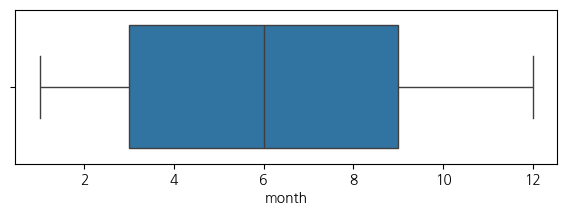

In [ ]:
# 전체 item의 리뷰 날짜 빈도 확인
plt.figure(figsize=(7,2))
sns.boxplot(x=df['month'])

In [ ]:
### 해석 ###
# Q1=3, Q2=6, Q3=9
# 리뷰가 작성된 달이 전반적으로 고루 분포되어 있음을 의미함

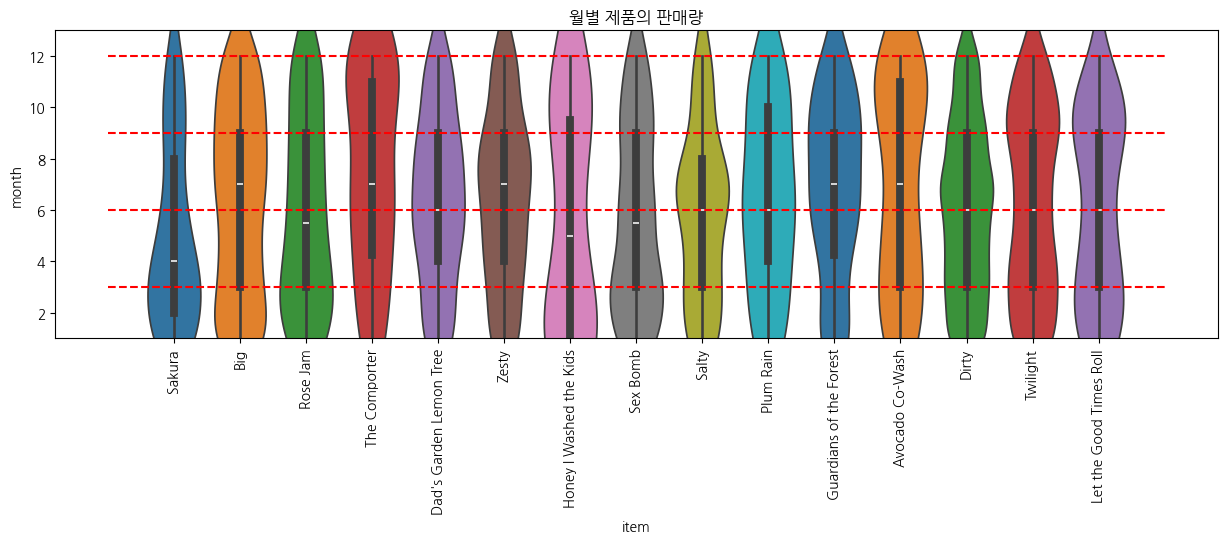

In [ ]:
# 월별 제품의 판매량
plt.figure(figsize=(15,4))
plt.ylim(1, 13)
plt.xticks(rotation=90)
sns.violinplot(x='item', y='month', data=df, palette='tab10')
plt.title('월별 제품의 판매량')
plt.hlines(3, -1, 15, colors='r', linestyles='--') # spring
plt.hlines(6, -1, 15, colors='r', linestyles='--') # summer
plt.hlines(9, -1, 15, colors='r', linestyles='--') # autumn
plt.hlines(12, -1, 15, colors='r', linestyles='--') # winter

plt.show()

In [ ]:
### 해석 ###
# Sakura는 주로 1~4월에 많이 판매된다.
# Big은 4~5월에 판매량이 미세하게 저조한 것으로 보이나, 큰 차이가 나타나지 않는다.
# Rose Jam은 2~4월에 판매량이 많은 편이고, 하반기로 갈수록 판매량이 줄어든다.
# The Comporter는 1~4월에 판매량이 적고, 10~12월에 판매량이 많은 편이다.
# Dad's Garden Lemon Tree는 4~9월에 판매량이 많고, 10~3월은 판매량이 적다.
# Zesty는 7~9월에 판매량이 많고, 10~6월은 판매량이 적다.
# Honey I washed the Kids는 1~4월, 9~11월에 판매량이 많다. 4~6월까지 판매량이 감소하고, 6월 기점으로 판매량이 증가하기 시작한다.
# Sex Bomb는 2~4월에 판매량이 많고, 하반기로 갈수록 판매량이 줄어든다.
# Salty는 주로 5~8월에 많이 판매된다.
# Plum Rain은 6월에 조금 더 많이 판매되는 듯 하나 큰 차이가 없다.
# Guardians of the Forest는 1~4월까지 판매량이 저조하다.
# Avocado Co-Wash는 7월의 판매량이 가장 저조하며, 1~4월과 9~12월의 판매량이 상대적으로 높다.
# Dirty는 7월에 판매량이 가장 많으며, 8월을 기점으로 판매량이 줄어든다.
# Twilight는 1~5월, 8~10월의 판매량이 많고 6월의 판매량이 저조하다.
# Let the Good Times Roll은 Twilight과 비슷한 분포가 나타난다.
# --> 제품마다 달별 판매량이 차이가 나는 모습을 시각화 그래프를 통해 알 수 있다.

In [ ]:
# LUSH 세일이 주로 2월에 있는데, 그럼에도 2월 판매량이 모든 item에서 눈에 띄게 두드러지는 것은 아니다.
# The Comporter, Dad's Garden Lemon Tree, Zesty, Salty, Guardians of the Forest는 2월의 판매량이 많지 않은 편이다.

#### 변수변환 및 파생변수 생성

In [ ]:
# 계절 변수 생성
for i in df['month']:
  if i >= 3 and i <= 5:
    df.loc[df['month'] == i, 'season'] = 'spring'
  elif i >= 6 and i <= 8:
    df.loc[df['month'] == i, 'season'] = 'summer'
  elif i >= 9 and i <= 11:
    df.loc[df['month'] == i, 'season'] = 'fall'
  else:
    df.loc[df['month'] == i, 'season'] = 'winter'
df.head()

,item,note,scent_note,scent_detail,price,year,month,season
0,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter
1,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter
2,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter
3,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter
4,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter


In [ ]:
# 제품별 구매량 변수 생성
df['sales_per_item'] = df.groupby('item')['item'].transform('count')
df.head()

,item,note,scent_note,scent_detail,price,year,month,season,sales_per_item
0,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130
1,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130
2,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130
3,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130
4,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130


In [ ]:
# 향료 계열 변수 생성
#'citrus', 'floral', 'sweety', 'fruity', 'woody', 'balsam', 'green'
df_sn = df.copy()
for scent in snote_list:
    df_sn[f'sn_{scent}'] = df['scent_note'].str.contains(scent).astype(int)
df_sn.head()

,item,note,scent_note,scent_detail,price,year,month,season,sales_per_item,sn_citrus,sn_floral,sn_sweety,sn_fruity,sn_woody,sn_balsam,sn_green
0,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130,1,1,0,0,0,0,0
1,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130,1,1,0,0,0,0,0
2,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130,1,1,0,0,0,0,0
3,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130,1,1,0,0,0,0,0
4,Sakura,"neroli,jasmin,lemon","citrus,floral",floral,80000,2025,1,winter,130,1,1,0,0,0,0,0


Text(0.5, 1.0, '월별 바디 스프레이 판매량 (~2024)')

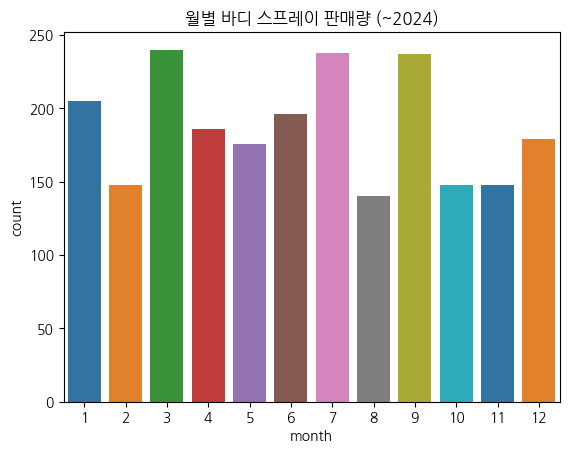

In [ ]:
# 월별 총 제품의 판매량 (~2024)
df_2024 = df.copy()
df_2024 = df_2024[df_2024["year"] != 2025] # 2025년 데이터가 1월까지만 존재하기 때문에 2024년 데이터만 사용
sns.countplot(data=df_2024, x="month", palette="tab10")
plt.title('월별 바디 스프레이 판매량 (~2024)')

In [ ]:
### 해석 ###
# 1월, 3월, 7월, 9월의 판매량이 유난히 높게 나타났다.
# 하지만 이 그래프에서 특별한 경향성이 보이지 않는다.

Text(0.5, 1.0, '계절별 바디 스프레이 판매량 (~2024)')

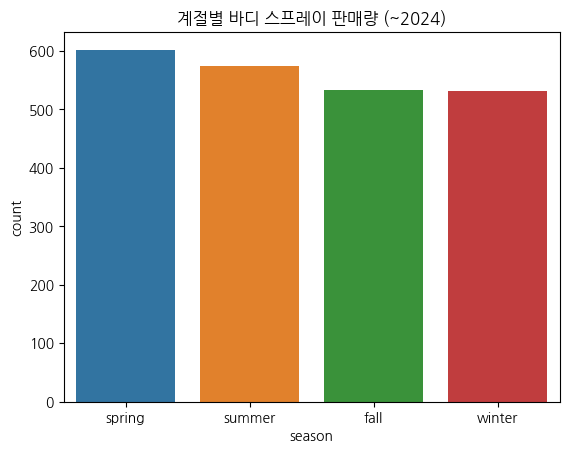

In [ ]:
# 계절별 총 제품의 판매량 (~2024)
sns.countplot(data=df_2024, x="season", order = df_2024["season"].value_counts().index, palette="tab10")
plt.title('계절별 바디 스프레이 판매량 (~2024)')

In [ ]:
### 해석 ###
# 총 제품의 계절별 판매량은 봄, 여름, 가을, 겨울 순으로 높다.
# 겨울에 세일이 있기 때문에 가장 많은 판매율을 기록했을 것으로 생각했으나
# 이 리뷰 데이터 그래프로 미루어 보면 그렇지 않음을 알 수 있다.
# 아마 겨울(주로 2월)에 있는 '프레시세일'은 한정수량으로 판매하기 때문인 것으로 보인다.
# 계절간의 판매량이 차이가 나긴 하지만, 판매량이 크게 차이 나진 않는 것으로 보인다.

In [ ]:
# 각 향료 계열의 데이터만 뽑아서 계절별로 파악
df_sn_2024 = df_sn[df_sn["year"] != 2025]

df_citrus = df_sn_2024[(df_sn_2024['sn_citrus'] == 1)]
df_floral = df_sn_2024[(df_sn_2024['sn_floral'] == 1)]
df_sweety = df_sn_2024[(df_sn_2024['sn_sweety'] == 1)]
df_fruity = df_sn_2024[(df_sn_2024['sn_fruity'] == 1)]
df_woody = df_sn_2024[(df_sn_2024['sn_woody'] == 1)]
# Dirty는 woody보다 green의 향료가 더 강하고, 다른 제품보다 압도적으로 많이 판매된 제품이기 때문에 제외하고 분석해봄
df_woody_wod = df_woody[df_woody.item != 'Dirty']
df_balsam = df_sn_2024[(df_sn_2024['sn_balsam'] == 1)]
df_green = df_sn_2024[(df_sn_2024['sn_green'] == 1)]

In [ ]:
# 봄의 평균기온
w_spr = weather[(weather['month'] == 3) | (weather['month'] == 4) | (weather['month'] == 5)]
w_spr_mean = round(w_spr['평균기온(℃)'].mean())

# 여름의 평균기온
w_summ = weather[(weather['month'] == 6) | (weather['month'] == 7) | (weather['month'] == 8)]
w_summ_mean = round(w_summ['평균기온(℃)'].mean())

# 가을의 평균기온
w_aut = weather[(weather['month'] == 9) | (weather['month'] == 10) | (weather['month'] == 11)]
w_aut_mean = round(w_aut['평균기온(℃)'].mean())

# 겨울의 평균기온
w_wint = weather[(weather['month'] == 12) | (weather['month'] == 1) | (weather['month'] == 2)]
w_wint_mean = round(w_wint['평균기온(℃)'].mean())

print(w_spr_mean, w_summ_mean, w_aut_mean, w_wint_mean)

14 26 16 0


In [ ]:
# 계절별 평균기온 데이터프레임 생성
season_temp = pd.DataFrame({
    'season': ['spring', 'summer', 'fall', 'winter'],
    'temp': [w_spr_mean, w_summ_mean, w_aut_mean, w_wint_mean]
})
season_temp

,season,temp
0,spring,14
1,summer,26
2,fall,16
3,winter,0


<Axes: title={'center': 'Sweety'}, xlabel='season', ylabel='count'>

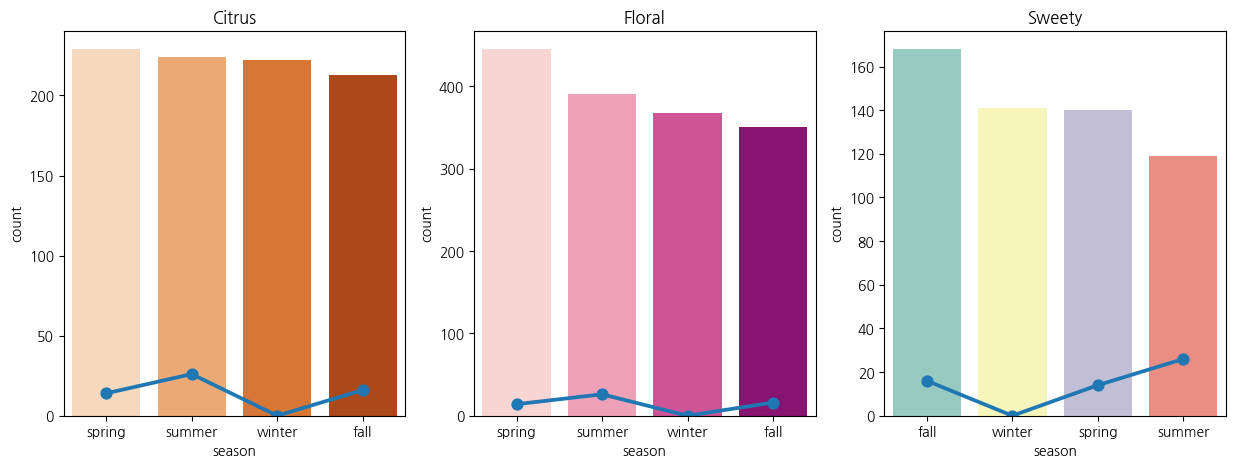

In [ ]:
# 계절에 따른 향료 계열별 판매량 1
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Citrus')
sns.countplot(data=df_citrus, x="season", order = df_citrus["season"].value_counts().index, palette="Oranges")
sns.pointplot(x = "season", y = "temp", data=season_temp)
plt.subplot(132)
plt.title('Floral')
sns.countplot(data=df_floral, x="season", order = df_floral["season"].value_counts().index, palette="RdPu")
sns.pointplot(x = "season", y = "temp", data=season_temp)
plt.subplot(133)
plt.title('Sweety')
sns.countplot(data=df_sweety, x="season", order = df_sweety["season"].value_counts().index, palette="Set3")
sns.pointplot(x = "season", y = "temp", data=season_temp)

In [ ]:
### 해석 ###
# citrus 계열 제품은 봄 > 여름 > 겨울 > 가을 순으로 판매율이 높다. (대체로 따뜻한 계절에 판매량 높음)
# (하지만 citrus는 계절에 따른 판매량 차이는 크지 않다.)
# floral 계열 제품은 봄 > 여름 > 겨울 > 가을 순으로 판매율이 높다. (대체로 따뜻한 계절에 판매량 높음)
# sweety 계열 제품은 가을 > 겨울 > 봄 > 여름 순으로 판매율이 높다. (대체로 서늘한 계절에 판매량 높음)

In [ ]:
print("Citrus 포함 제품:", df_sn[df_sn["sn_citrus"]==1]["item"].unique())
print("Floral 포함 제품:", df_sn[df_sn["sn_floral"]==1]["item"].unique())
print("Sweety 포함 제품:", df_sn[df_sn["sn_sweety"]==1]["item"].unique())

Citrus 포함 제품: ['Sakura' 'Big' 'Rose Jam' "Dad's Garden Lemon Tree" 'Zesty'
 'Honey I Washed the Kids' 'Plum Rain' 'Guardians of the Forest'
 'Avocado Co-Wash']
Floral 포함 제품: ['Sakura' 'Rose Jam' 'Sex Bomb' 'Salty' 'Plum Rain' 'Dirty' 'Twilight']
Sweety 포함 제품: ['Big' 'Twilight' 'Let the Good Times Roll']


<Axes: title={'center': 'Green'}, xlabel='season', ylabel='count'>

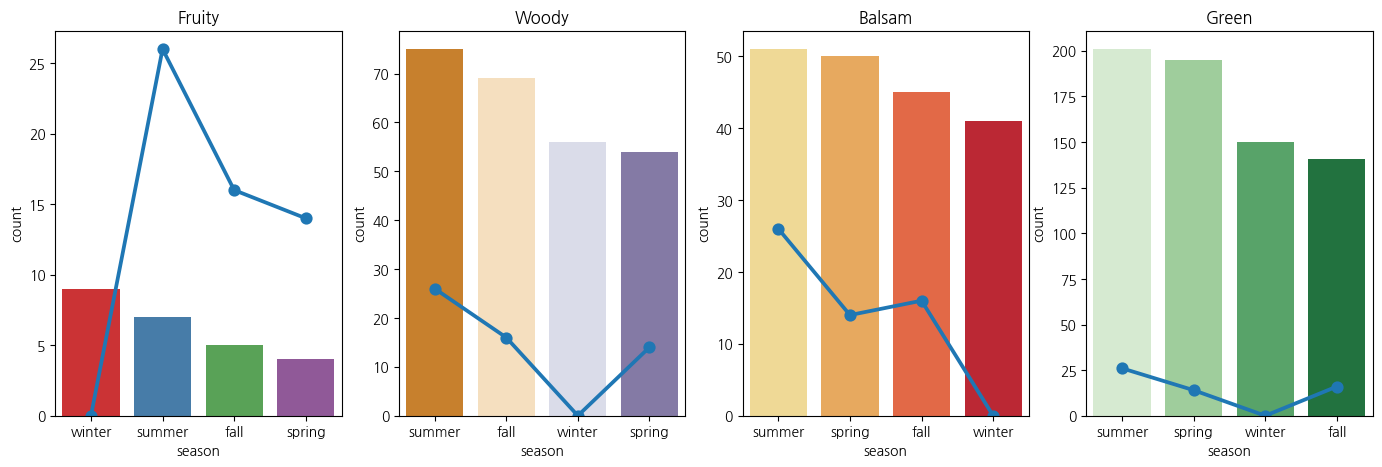

In [ ]:
# 계절에 따른 향료 계열별 판매량 2
plt.figure(figsize=(17,5))
plt.subplot(141)
plt.title('Fruity')
sns.countplot(data=df_fruity, x="season", order = df_fruity["season"].value_counts().index, palette="Set1")
sns.pointplot(x = "season", y = "temp", data=season_temp)
plt.subplot(142)
plt.title('Woody')
sns.countplot(data=df_woody_wod, x="season", order = df_woody_wod["season"].value_counts().index, palette="PuOr")
sns.pointplot(x = "season", y = "temp", data=season_temp)
plt.subplot(143)
plt.title('Balsam')
sns.countplot(data=df_balsam, x="season", order = df_balsam["season"].value_counts().index, palette="YlOrRd")
sns.pointplot(x = "season", y = "temp", data=season_temp)
plt.subplot(144)
plt.title('Green')
sns.countplot(data=df_green, x="season", order = df_green["season"].value_counts().index, palette="Greens")
sns.pointplot(x = "season", y = "temp", data=season_temp)

In [ ]:
### 해석 ###
# fruity 계열 제품은 겨울 > 여름 > 가을 > 봄 순으로 판매율이 높다.
# (fruity의 경우 계절에 따른 판매량 격차가 비교적 크게 나타난다.)
# (그리고 다른 향들은 계절별 기온 변화에 어느 정도 일관성을 보이는 반면 fruity는 그렇지 않다.)
# (fruity의 데이터 수가 다른 향료 계열에 비해 적은 것(25개)이 원인일 수도 있다)
# woody 계열 제품은 여름 > 봄 > 가을 > 겨울 순으로 판매율이 높다. (대체로 따뜻한 계절에 판매량 높음)
# balsam 계열 제품은 여름 > 봄 > 가을 > 겨울 순으로 판매율이 높다. (대체로 따뜻한 계절에 판매량 높음)
# green 계열 제품은 여름 > 봄 > 겨울 > 가을 순으로 판매율이 높다. (대체로 따뜻한 계절에 판매량 높음)

In [ ]:
print("Fruity 포함 제품:", df_sn[df_sn["sn_fruity"]==1]["item"].unique())
print("Woody 포함 제품:", df_sn[df_sn["sn_woody"]==1]["item"].unique())
print("Balsam 포함 제품:", df_sn[df_sn["sn_balsam"]==1]["item"].unique())
print("Green 포함 제품:", df_sn[df_sn["sn_green"]==1]["item"].unique())
print("단, 위 그래프에서 Ditry 제품은 Woody 계열에서 제외하였음")

Fruity 포함 제품: ['The Comporter']
Woody 포함 제품: ['The Comporter' 'Salty' 'Guardians of the Forest' 'Dirty'
 'Let the Good Times Roll']
Balsam 포함 제품: ['Zesty' 'Avocado Co-Wash']
Green 포함 제품: ['Dirty']
단, 위 그래프에서 Ditry 제품은 Woody 계열에서 제외하였음


#### 상관분석

In [ ]:
df_sn = df_sn.merge(weather, on=['year', 'month'], how='left')
df_sn.tail()

,item,note,scent_note,scent_detail,price,year,month,season,sales_per_item,sn_citrus,...,sn_sweety,sn_fruity,sn_woody,sn_balsam,sn_green,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
2336,Let the Good Times Roll,"cinnamon,corn","woody,sweety",sweet,70000,2021,3,spring,54,0,...,1,0,1,0,0,9.0,14.8,22.9,4.3,-1.2
2337,Let the Good Times Roll,"cinnamon,corn","woody,sweety",sweet,70000,2021,3,spring,54,0,...,1,0,1,0,0,9.0,14.8,22.9,4.3,-1.2
2338,Let the Good Times Roll,"cinnamon,corn","woody,sweety",sweet,70000,2021,2,winter,54,0,...,1,0,1,0,0,2.7,7.9,17.4,-2.2,-10.6
2339,Let the Good Times Roll,"cinnamon,corn","woody,sweety",sweet,70000,2021,1,winter,54,0,...,1,0,1,0,0,-2.4,2.2,13.9,-6.8,-18.6
2340,Let the Good Times Roll,"cinnamon,corn","woody,sweety",sweet,70000,2021,1,winter,54,0,...,1,0,1,0,0,-2.4,2.2,13.9,-6.8,-18.6


In [ ]:
salesPmonth=df_sn.groupby(['year', 'month']).agg({'sn_floral':'sum', 'sn_citrus':'sum', 'sn_sweety':'sum',
                                        'sn_fruity':'sum', 'sn_woody':'sum', 'sn_balsam':'sum', 'sn_green':'sum'}).reset_index()
salesPmonth.head()

,year,month,sn_floral,sn_citrus,sn_sweety,sn_fruity,sn_woody,sn_balsam,sn_green
0,2021,1,84,49,36,0,31,4,26
1,2021,2,66,31,17,1,35,6,32
2,2021,3,79,38,27,1,41,11,36
3,2021,4,73,39,24,2,40,8,32
4,2021,5,56,28,19,0,30,7,28


In [ ]:
salesPmonth = salesPmonth.merge(weather, on=['year', 'month'], how='left')
salesPmonth.tail()

,year,month,sn_floral,sn_citrus,sn_sweety,sn_fruity,sn_woody,sn_balsam,sn_green,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
43,2024,9,41,35,30,0,21,11,12,25.5,29.8,34.6,22.0,15.6
44,2024,10,31,24,22,0,14,3,6,16.7,21.4,25.7,12.7,7.1
45,2024,11,34,37,15,1,20,10,7,9.7,14.9,25.1,5.5,-3.4
46,2024,12,48,51,22,3,27,15,15,0.8,5.3,13.0,-2.9,-7.7
47,2025,1,57,53,26,1,32,13,19,0.0,4.6,11.4,-3.9,-12.2


In [ ]:
# 상관관계 분석을 위한 변수만 가진 데이터프레임 생성
#df_corr = df_sn.drop(['item','note', 'scent_note', 'scent_detail', 'season', 'price', 'year'], axis=1)
df_corr = salesPmonth.copy()
df_corr.head()

,year,month,sn_floral,sn_citrus,sn_sweety,sn_fruity,sn_woody,sn_balsam,sn_green,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
0,2021,1,84,49,36,0,31,4,26,-2.4,2.2,13.9,-6.8,-18.6
1,2021,2,66,31,17,1,35,6,32,2.7,7.9,17.4,-2.2,-10.6
2,2021,3,79,38,27,1,41,11,36,9.0,14.8,22.9,4.3,-1.2
3,2021,4,73,39,24,2,40,8,32,14.2,19.5,28.2,9.5,3.1
4,2021,5,56,28,19,0,30,7,28,17.1,21.9,30.8,12.8,7.3


<Axes: >

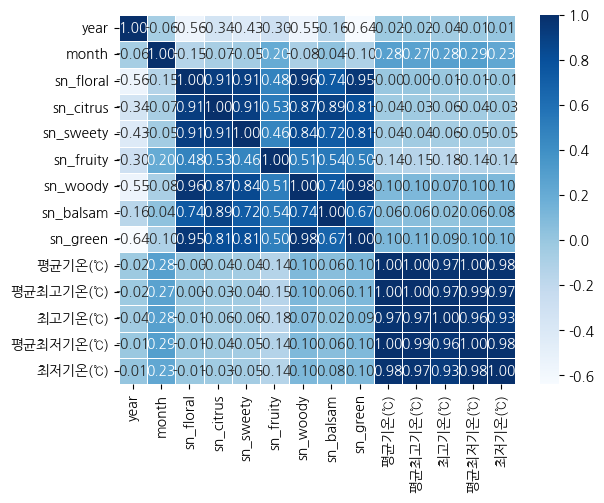

In [ ]:
sns.heatmap(data = df_corr.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

# 각 향료의 월별 판매량과 월별 평균기온 사이에는 상관성이 없는 것으로 보인다.

In [ ]:
df_green.head()

,item,note,scent_note,scent_detail,price,year,month,season,sales_per_item,sn_citrus,sn_floral,sn_sweety,sn_fruity,sn_woody,sn_balsam,sn_green
1275,Dirty,"sandalwood,lavender,spearmint","floral,woody,green","fresh,woody",70000,2024,12,winter,706,0,1,0,0,1,0,1
1276,Dirty,"sandalwood,lavender,spearmint","floral,woody,green","fresh,woody",70000,2024,12,winter,706,0,1,0,0,1,0,1
1277,Dirty,"sandalwood,lavender,spearmint","floral,woody,green","fresh,woody",70000,2024,12,winter,706,0,1,0,0,1,0,1
1278,Dirty,"sandalwood,lavender,spearmint","floral,woody,green","fresh,woody",70000,2024,12,winter,706,0,1,0,0,1,0,1
1279,Dirty,"sandalwood,lavender,spearmint","floral,woody,green","fresh,woody",70000,2024,12,winter,706,0,1,0,0,1,0,1


#### 카이제곱 검정

In [ ]:
df_citrus['season'].value_counts()

,count
season,
spring,229
summer,224
winter,222
fall,213


In [ ]:
from scipy.stats import chisquare

# 데이터프레임 딕셔너리
dataframes = {
    'citrus': df_citrus,
    'floral': df_floral,
    'sweety': df_sweety,
    'fruity': df_fruity,
    'woody': df_woody_wod,
    'balsam': df_balsam,
    'green': df_green
}

# 카이제곱 검정 결과 저장 딕셔너리
chisq_results = {}

# 카이제곱 검정을 각 데이터프레임에 반복 수행

for scent, dft in dataframes.items():
    # 계절별 판매량 그룹화
    spring_sales = dft[dft['season'] == 'spring'].shape[0]
    summer_sales = dft[dft['season'] == 'summer'].shape[0]
    fall_sales = dft[dft['season'] == 'fall'].shape[0]
    winter_sales = dft[dft['season'] == 'winter'].shape[0]

    # 관측값 (계절별 판매량)
    obs = [spring_sales, summer_sales, fall_sales, winter_sales]

    # 기대값 (모든 계절이 동일하다고 가정)
    expected = [sum(obs) / len(obs)] * len(obs)

    # 카이제곱 검정 수행
    chi2_stat, p_value = chisquare(f_obs=obs, f_exp=expected)

    # 결과 저장
    chisq_results[scent] = {'Chi2-Statistic': chi2_stat, 'p-value': p_value}

    # 결과 출력
    print(f"=== {scent.capitalize()} ===")
    print("Chi2-Statistic:", chi2_stat)
    print("p-value:", p_value)

    # 유의수준 0.05로 결과 해석
    if p_value < 0.05:
        print("p-value가 0.05보다 작으므로 귀무가설을 기각합니다. 계절에 따른 판매량 차이가 유의미합니다.")
    else:
        print("p-value가 0.05보다 크므로 귀무가설을 기각하지 않습니다. 계절에 따른 판매량 차이가 유의미하지 않습니다.")
    print()

# 전체 결과 확인
print("=== Chi2 Results Summary ===")
for scent, result in chisq_results.items():
    print(f"{scent.capitalize()}: Chi2-Statistic = {result['Chi2-Statistic']:.2f}, p-value = {result['p-value']:.4f}")

=== Citrus ===
Chi2-Statistic: 0.6036036036036037
p-value: 0.8956069173571075
p-value가 0.05보다 크므로 귀무가설을 기각하지 않습니다. 계절에 따른 판매량 차이가 유의미하지 않습니다.

=== Floral ===
Chi2-Statistic: 13.129987129987132
p-value: 0.004363769231392524
p-value가 0.05보다 작으므로 귀무가설을 기각합니다. 계절에 따른 판매량 차이가 유의미합니다.

=== Sweety ===
Chi2-Statistic: 8.52112676056338
p-value: 0.03638423288720712
p-value가 0.05보다 작으므로 귀무가설을 기각합니다. 계절에 따른 판매량 차이가 유의미합니다.

=== Fruity ===
Chi2-Statistic: 2.36
p-value: 0.5011240391561651
p-value가 0.05보다 크므로 귀무가설을 기각하지 않습니다. 계절에 따른 판매량 차이가 유의미하지 않습니다.

=== Woody ===
Chi2-Statistic: 4.866141732283465
p-value: 0.18186544266348262
p-value가 0.05보다 크므로 귀무가설을 기각하지 않습니다. 계절에 따른 판매량 차이가 유의미하지 않습니다.

=== Balsam ===
Chi2-Statistic: 1.3850267379679146
p-value: 0.7090482701812344
p-value가 0.05보다 크므로 귀무가설을 기각하지 않습니다. 계절에 따른 판매량 차이가 유의미하지 않습니다.

=== Green ===
Chi2-Statistic: 16.388646288209607
p-value: 0.0009437934712001591
p-value가 0.05보다 작으므로 귀무가설을 기각합니다. 계절에 따른 판매량 차이가 유의미합니다.

=== Chi2 Results Summary ===
Cit

In [ ]:
chisq_results

{'citrus': {'Chi2-Statistic': 0.6036036036036037,
  'p-value': 0.8956069173571075},
 'floral': {'Chi2-Statistic': 13.129987129987132,
  'p-value': 0.004363769231392524},
 'sweety': {'Chi2-Statistic': 8.52112676056338,
  'p-value': 0.03638423288720712},
 'fruity': {'Chi2-Statistic': 2.36, 'p-value': 0.5011240391561651},
 'woody': {'Chi2-Statistic': 14.209351753453772,
  'p-value': 0.002633605204014461},
 'balsam': {'Chi2-Statistic': 1.3850267379679146,
  'p-value': 0.7090482701812344},
 'green': {'Chi2-Statistic': 16.388646288209607,
  'p-value': 0.0009437934712001591}}

In [ ]:
### 해석 ###
# citrus, fruity, balsam: 계절별 판매량 차이가 유의미하지 않다.
# floral, sweety, woody, green: 계절별 판매량 차이가 유의미하다.
# -> 계절별로 판매량이 차이가 나는 향료도 있고, 그렇지 않은 향료도 있다.
# 하지만 향료 계열별 그래프에서 볼 수 있듯 fruity를 제외하곤 계절의 기온 차이에 따른 판매량 차이의 경향성이 어느 정도 있음을 알 수 있다.
# 그러므로 유의미하지 않다고 나온 향료 계열들도 계절의 영향을 아예 받지 않는다기보단,
# 다른 계절에도 상대적으로 인기가 있어서 카이제곱 검정에서 유의미한 차이가 나타나지 않은 것으로 보인다.

In [ ]:
# 제품별 계절의 판매량 카이제곱 검정?